In [102]:
# 0. Przygotowanie danych

import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('data.csv')
#print(df.info())
#print(df.describe())
numerical_features = ['age', 'income', 'outcome']
numerical_df = df[numerical_features]

if numerical_df.isnull().sum().any():
    numerical_df.fillna(numerical_df.mean(), inplace=True)




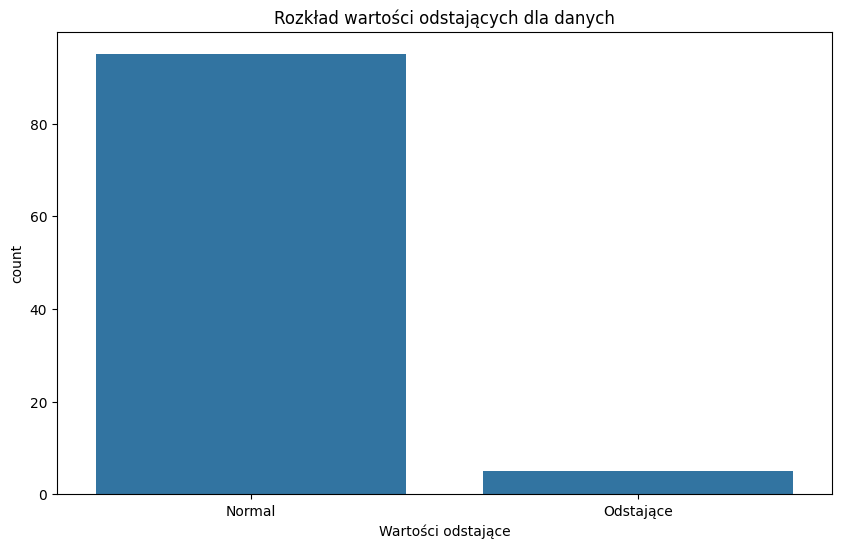

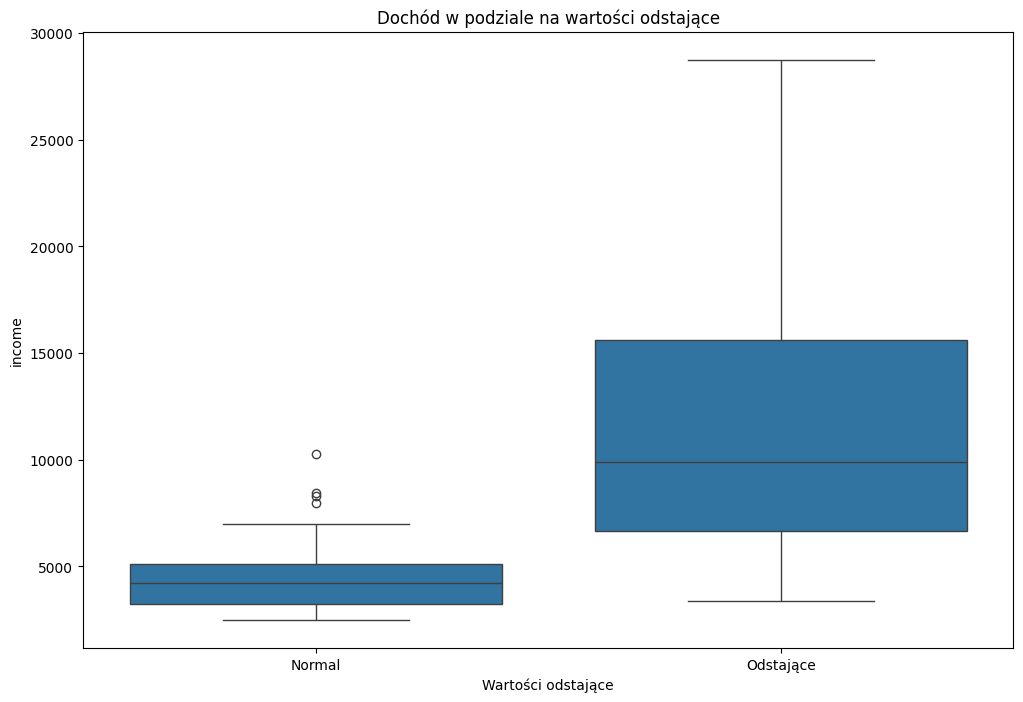

In [103]:
# 1. Zidentyfikować wartości odstające za pomocą algorytmu Isolation Forest

scaler = StandardScaler()
numerical_df_scaled = scaler.fit_transform(numerical_df)

# Model Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Wartości odstające'] = iso_forest.fit_predict(numerical_df_scaled)

# Oznaczenie wartości odstających (-1 oznacza odstające, 1 oznacza normalne)
df['Wartości odstające'] = df['Wartości odstające'].apply(lambda x: 'Odstające' if x == -1 else 'Normal')

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Wartości odstające')
plt.title("Rozkład wartości odstających dla danych")
plt.show()

# Analiza zmiennych z uwzględnieniem odstających wartości
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Wartości odstające', y='income')
plt.title("Dochód w podziale na wartości odstające")
plt.show()

Wariancja wyjaśniana przez każdą składową: [0.45100556 0.32383586]
Łączna wariancja: 0.77


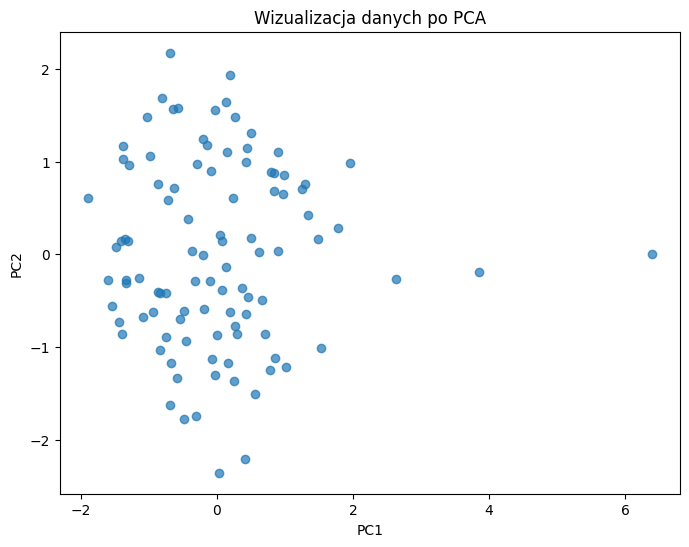

In [104]:
# 2. Redukować wymiarowość danych z użyciem PCA,
# Redukcja do 2 wymiarów
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_df_scaled)
df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]

# Wynik w formie DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

explained_variance = pca.explained_variance_ratio_
print(f"Wariancja wyjaśniana przez każdą składową: {explained_variance}")
print(f"Łączna wariancja: {sum(explained_variance):.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Wizualizacja danych po PCA')
plt.show()


In [105]:
# 3. Tworzyć zaawansowane interaktywne wizualizacje danych,
df['Różnica między dochodami a wydatkami'] = df['income'] - df['outcome']
fig_pca = px.scatter(df, x='Różnica między dochodami a wydatkami', y='savings', color='income', hover_data=['name', 'age', 'income', 'outcome', 'savings'], title='', labels={'income': 'Dochód miesięczny'})
fig_pca.show()


In [106]:
fig_box = px.box(df, x='Wartości odstające', y='income', color='Wartości odstające',
                 title='Rozkład dochodów w zależności od wartości odstających')
fig_box.show()


In [107]:
fig_hist = px.histogram(df, x='Wartości odstające', color='Wartości odstające',
                        title='Rozkład wartości odstających w danych', marginal='box')
fig_hist.show()


In [108]:
fig_children_income = px.scatter(df, x='children', y='income', color='income', hover_data=['name', 'age', 'income'],
                                 title='Zależność między liczbą dzieci a dochodem')
fig_children_income.show()


c:\Programs\Pythonek\3.11\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Programs\Pythonek\3.11\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Programs\Pythonek\3.11\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



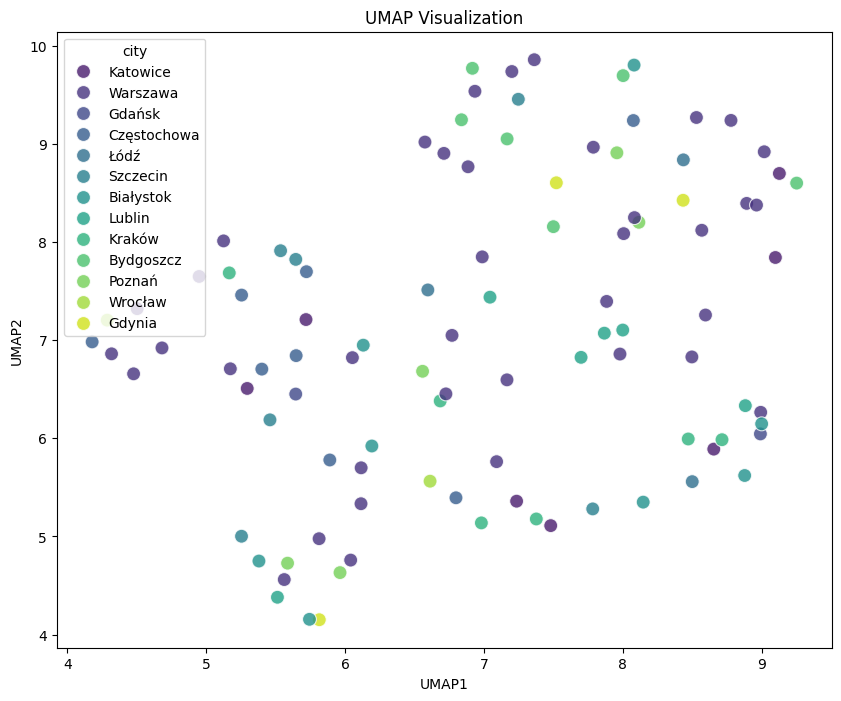

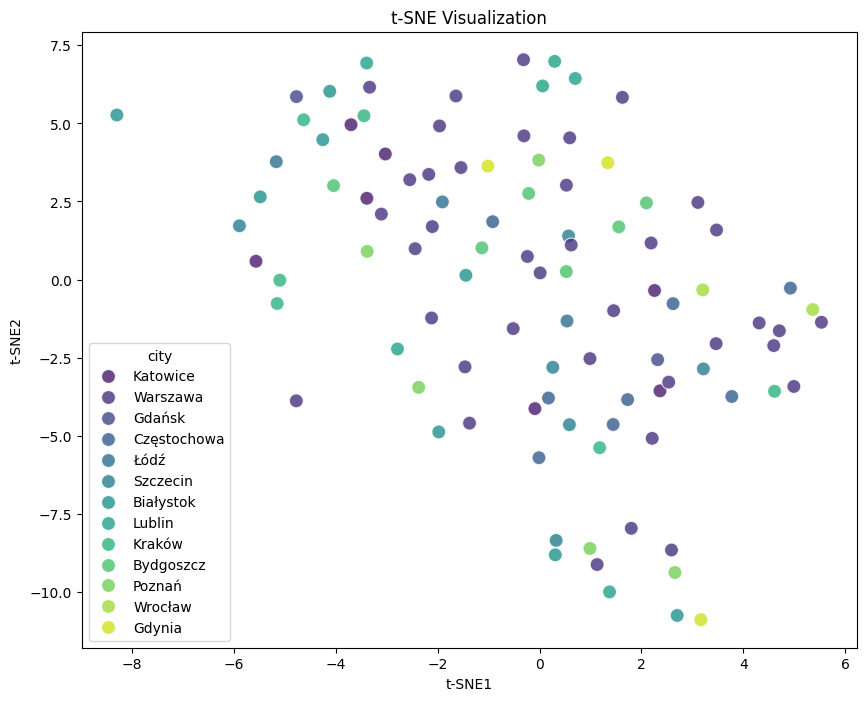

In [109]:
# 4. Zwizualizować dane wielowymiarowe za pomocą zaawansowanych algorytmów (t-SNE, UMAP)

from sklearn.manifold import TSNE
from umap import UMAP


columns_of_interest = ['age', 'income', 'outcome', 'savings', 'credit_score', 'spending_score']
X = df[columns_of_interest]

# Skalowanie danych (standardizacja)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Użycie UMAP do redukcji wymiarowości
umap_model = UMAP(n_components=2, random_state=42)
umap_results = umap_model.fit_transform(X_scaled)

tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_results = tsne_model.fit_transform(X_scaled)

# Połączmy wyniki z danymi oryginalnymi
umap_df = pd.DataFrame(umap_results, columns=['UMAP1', 'UMAP2'])
tsne_df = pd.DataFrame(tsne_results, columns=['t-SNE1', 't-SNE2'])
df_umap = pd.concat([df, umap_df], axis=1)
df_tsne = pd.concat([df, tsne_df], axis=1)

# UMAP
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_umap, x='UMAP1', y='UMAP2', hue='city', palette='viridis', s=100, alpha=0.8)
plt.title('UMAP Visualization')
plt.show()

# t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_tsne, x='t-SNE1', y='t-SNE2', hue='city', palette='viridis', s=100, alpha=0.8)
plt.title('t-SNE Visualization')
plt.show()



In [110]:
# 5. tworzyć interaktywne wizualizacje danych w 2D i 3D,
fig = px.scatter(df, x='income', y='outcome', color='city', hover_data=['name', 'city'])
fig.update_layout(title="Wykres dochodów i wydatków w zależności od miasta",
                  xaxis_title="Dochód",
                  yaxis_title="Wydatki")
fig.show()



fig = px.scatter(df, x='savings', y='children', color='employment_status', hover_data=['name', 'employment_status'])
fig.update_layout(title="Zależność między oszczędnościami a liczbą dzieci",
                  xaxis_title="Oszczędności",
                  yaxis_title="Liczba dzieci")
fig.show()



fig = px.scatter_3d(df, x='credit_score', y='age', z='spending_score', color='city', hover_data=['name'])
fig.update_layout(title="Zależność między wiekiem, punktami kredytowymi i wydatkami",)
fig.show()



In [111]:
# 6. Analizować zależności między zmiennymi za pomocą macierzy korelacji.
import plotly.figure_factory as ff

#Numeric dataframe:
numerical_features = ['income', 'outcome', 'savings']
numeric_df = df[numerical_features]
correlation_matrix = numeric_df.corr()
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns.tolist(),
    y=correlation_matrix.columns.tolist(),
    colorscale='Viridis',
    showscale=True,
)

fig.update_layout(title="Macierz korelacji zmiennych")
fig.show()

In [112]:
# 7. Przeprowadzać testy statystyczne dla analizy różnic w grupach.

from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import chi2_contingency

# Test T-studenta
group1 = df[df['employment_status'] == 'employed']['income']
group2 = df[df['employment_status'] == 'retired']['income']

t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"T-statystyka: {t_stat}")
print(f"P-wartość: {p_value}")
if p_value < 0.05:
    print("Istnieje istotna różnica w średnich income między grupą zatrudnionych a emerytami.")
else:
    print("Brak istotnej różnicy w średnich income między grupą zatrudnionych a emerytami.")


# Test ANOVA
model = ols('outcome ~ employment_status', data=df).fit()
anova_table = anova_lm(model)

print(anova_table)

if anova_table['PR(>F)'][0] < 0.05:
    print("Istnieje istotna różnica w średnich outcome między przynajmniej dwoma grupami employment_status. (Pracujący zarabiają więcej niż emeryci)")
else:
    print("Brak istotnej różnicy w średnich outcome między przynajmniej dwoma grupami employment_status.")

# Test Chi-kwadrat
contingency_table = pd.crosstab(df['employment_status'], df['city'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-kwadrat statystyka: {chi2_stat}")
print(f"P-wartość: {p_val}")

if p_val < 0.05:
    print("Istnieje istotna zależność między employment_status a city. (np. w Warszawie jest więcej bezrobotnych)")
else:
    print("Brak istotnej zależności między employment_status a city.")


T-statystyka: 2.475167674044197
P-wartość: 0.017892150211199005
Istnieje istotna różnica w średnich income między grupą zatrudnionych a emerytami.
                     df        sum_sq       mean_sq         F    PR(>F)
employment_status   3.0  5.985035e+06  1.995012e+06  3.656684  0.015169
Residual           96.0  5.237563e+07  5.455795e+05       NaN       NaN
Istnieje istotna różnica w średnich outcome między przynajmniej dwoma grupami employment_status. (Pracujący zarabiają więcej niż emeryci)
Chi-kwadrat statystyka: 108.93872127301096
P-wartość: 2.9199950121951688e-09
Istnieje istotna zależność między employment_status a city. (np. w Warszawie jest więcej bezrobotnych)


C:\Users\mindgoner\AppData\Local\Temp\ipykernel_2660\4206117422.py:28: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

